<a href="https://colab.research.google.com/github/clferreira1985/PUC_RJ-Pos_Ciencia_de_Dados_e_Analytics/blob/main/Machine_Learning/MVP_Hotel_Reservations_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Prevendo cancelamentos de hotéis




## 1º Problema de Negócio

Identificar como se encontra a empresa, entender a taxa de cancelamento e prevê a intenção de compra do consumidor com a maquina preditiva que melhor se performar.


### Os dados

###### Eles forneceram a você os dados de suas reservas em um arquivo chamado hotel_bookings.csv, que contém o seguinte:

###### Coluna ---> Descrição
###### Booking_ID ---> Identificador único da reserva.
###### no_of_adults ---> O número de adultos.
###### no_of_children ---> O número de filhos.
###### no_of_weekend_nights ---> Número de noites de fim de semana (sábado ou domingo).
###### no_of_week_nights ---> Número de noites da semana (segunda a sexta).
###### type_of_meal_plan ---> Tipo de plano de refeições incluído na reserva.
###### required_car_parking_space ---> Se é necessário um espaço de estacionamento.
###### room_type_reserved ---> O tipo de quarto reservado.
###### lead_time ---> Número de dias antes da data de chegada em que a reserva foi feita.
###### arrival_year ---> Ano de chegada.
###### arrival_month ---> Mês de chegada.
###### arrival_date ---> Data do mês de chegada.
###### market_segment_type ---> Como foi feita a reserva.
###### repeated_guest ---> Se o hóspede já se hospedou anteriormente no hotel.
###### no_of_previous_cancellations ---> Número de cancelamentos anteriores.
###### no_of_previous_bookings_not_canceled ---> Número de reservas anteriores que não foram canceladas.
###### avg_price_per_room ---> Preço médio por dia da reserva.
###### no_of_special_requests ---> Contagem de pedidos especiais feitos como parte da reserva.
###### booking_status ---> Se a reserva foi cancelada ou não.

## 2º Análise Exploratória

#### Imports das bibliotecas

In [29]:
#Import das bibliotecas
import warnings
warnings.filterwarnings("ignore")

import pandas as pd #x
import numpy as np #x

import matplotlib.pyplot as plt #x
import seaborn as sns #x


from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler #x
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #x
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



#### Carga do Dataset

In [30]:
# Carrega o dataset
df = pd.read_csv('https://raw.githubusercontent.com/clferreira1985/Projetos_Python/main/Hotel_Reservations_Dataset/Hotel%20Reservations.csv')


In [31]:
#Amostra
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [32]:
# Shape
df.shape

(36275, 19)

In [33]:
df.rename(columns=({'Booking_ID':'reserva',
                    'no_of_adults':'qnt_de_adultos',
                    'no_of_children':'qnt_de_crianças',
                    'no_of_weekend_nights':'qnd_dias_final_de_semana',
                    'no_of_week_nights':'qnd_dias_úteis',
                    'type_of_meal_plan':'tipo_de_refeição',
                    'required_car_parking_space':'vaga_de_estacionamento',
                    'room_type_reserved':'tipo_de_reserva',
                    'lead_time':'tempo_de_reserva',
                    'arrival_year':'ano',
                    'arrival_month':'mês',
                    'arrival_date':'dia',
                    'market_segment_type':'canal_de_compra',
                    'repeated_guest':'qnt_de_hospedagem',
                    'no_of_previous_cancellations':'qnt_de_cancelamentos_anteriores',
                    'no_of_previous_bookings_not_canceled': 'qnt_de_reservas_anteriores_não_canceladas',
                    'avg_price_per_room':'media_dos_precos',
                    'no_of_special_requests':'qnt_de_pedidos_especiais',
                    'booking_status':'status_da_reserva',
                    'have_child':'tem filhos'}),inplace = True)

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   reserva                                    36275 non-null  object 
 1   qnt_de_adultos                             36275 non-null  int64  
 2   qnt_de_crianças                            36275 non-null  int64  
 3   qnd_dias_final_de_semana                   36275 non-null  int64  
 4   qnd_dias_úteis                             36275 non-null  int64  
 5   tipo_de_refeição                           36275 non-null  object 
 6   vaga_de_estacionamento                     36275 non-null  int64  
 7   tipo_de_reserva                            36275 non-null  object 
 8   tempo_de_reserva                           36275 non-null  int64  
 9   ano                                        36275 non-null  int64  
 10  mês                   

In [35]:
# Temos valores nulos?
df.isna().sum()

reserva                                      0
qnt_de_adultos                               0
qnt_de_crianças                              0
qnd_dias_final_de_semana                     0
qnd_dias_úteis                               0
tipo_de_refeição                             0
vaga_de_estacionamento                       0
tipo_de_reserva                              0
tempo_de_reserva                             0
ano                                          0
mês                                          0
dia                                          0
canal_de_compra                              0
qnt_de_hospedagem                            0
qnt_de_cancelamentos_anteriores              0
qnt_de_reservas_anteriores_não_canceladas    0
media_dos_precos                             0
qnt_de_pedidos_especiais                     0
status_da_reserva                            0
dtype: int64

In [36]:
#quantidade de categorias por coluna
df.select_dtypes(include='object').drop(columns = 'reserva').nunique()

tipo_de_refeição     4
tipo_de_reserva      7
canal_de_compra      5
status_da_reserva    2
dtype: int64

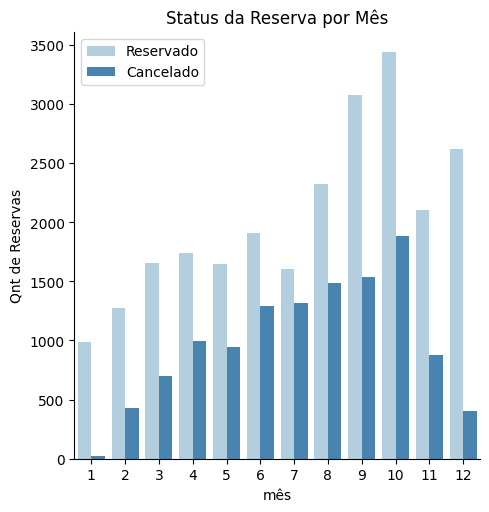

In [37]:
#plot

sns.catplot(data=df, x='mês', kind='count', palette = "Blues", hue='status_da_reserva', legend_out=False)
plt.ylabel('Qnt de Reservas')
plt.xlabel('mês')
plt.title('Status da Reserva por Mês')
plt.legend(['Reservado', 'Cancelado'])
plt.show()

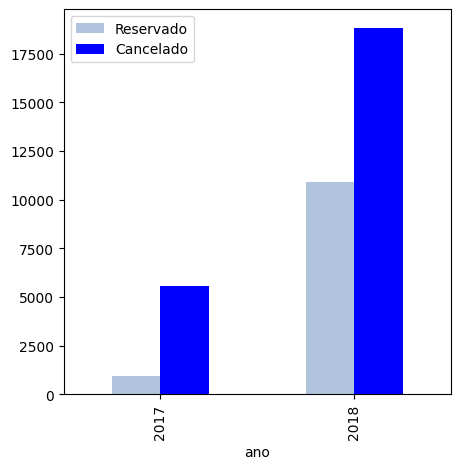

In [38]:
pd.crosstab(df["ano"], df['status_da_reserva']).plot(kind='bar',
                                                      stacked = False,
                                                      figsize = (5, 5),
                                                      color = ['lightsteelblue','b']).legend(['Reservado', 'Cancelado'])


### **Resumo**

Verifiquei que temos uma aumento significativo das vendas de um ano para outro, sendo que a quantidade de cancelamento não aumentou proporcional. Os maiores volumes de cancelamento ocorrem junho e outubro, isso é um problema para empresa.





## 3º Pré-processamento dos dados


#### Encode Classes

 - Transformando o Target e variáveis categóricas em variável numérica para melhorar a performance do algoritmo


In [39]:
label_encoder = preprocessing.LabelEncoder()
encoder=preprocessing.OneHotEncoder()

#Iteramdo sobre as colunas do DataFrame
for column in df.select_dtypes(include='object').drop(columns = 'reserva'):
    if df[column].nunique() < 5:
        # Aplicando o LabelEncoder na colunas que tem <=4
        df[column] = label_encoder.fit_transform(df[column])
    else:
        #Aplicando o OneHotencoder nas colunas que tem mais de 4 categorias
        df_encoded = df[column] = encoder.fit_transform(df[column].values.reshape(-1, 1)).toarray()
        #Criando novas colunas com os dados codificados
        column_names = [f"{column}_{i}" for i in range(df_encoded.shape[1])]
        df_encoded = pd.DataFrame(df_encoded, columns=column_names)
        df=pd.concat([df, df_encoded], axis=1)
        #Removendo a coluna original
        df.drop(column, axis=1, inplace=True)

In [40]:
  df.drop('reserva', axis=1, inplace=True)
  df.head()

,qnt_de_adultos,qnt_de_crianças,qnd_dias_final_de_semana,qnd_dias_úteis,tipo_de_refeição,vaga_de_estacionamento,tempo_de_reserva,ano,mês,dia,...,tipo_de_reserva_2,tipo_de_reserva_3,tipo_de_reserva_4,tipo_de_reserva_5,tipo_de_reserva_6,canal_de_compra_0,canal_de_compra_1,canal_de_compra_2,canal_de_compra_3,canal_de_compra_4
0,2,0,1,2,0,0,224,2017,10,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,2,3,3,0,5,2018,11,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,2,1,0,0,1,2018,2,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,0,0,2,0,0,211,2018,5,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,0,1,1,3,0,48,2018,4,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
df.shape

(36275, 28)

### Separação em conjunto de trreino e conjunto de teste com holdout




In [42]:
#separação em bases de treino e teste (holdout)
X=df.drop('status_da_reserva', axis=1)
y=df['status_da_reserva']
test_size=0.30 # Tamanho do conungto de teste
seed = 9 # semente aleatória
num_particoes=10
scoring='accuracy'
print(X.shape)
print(y.shape)

(36275, 27)
(36275,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_size,
                                                    shuffle=True,
                                                    random_state=seed) # holdout com estratificação

kfold = StratifiedKFold(n_splits=num_particoes,
                        shuffle=True,
                        random_state=seed) #validação cruzada com estratificação


##Modelagem e Inferência



#### Criação e avaliação de modelos:linha base

In [ ]:
# definindo uma semente global
np.random.seed(9)

#Lista que armazenará os modelos
models = []

#Criando os modelos e adicionando-os na lista de modelos

models.append(('LR', LogisticRegression(max_iter=300)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#Definindo os parâmetros do classificador base para o bagginclassifier
base = DecisionTreeClassifier()
num_trees = 200
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max=iter=300)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(("cart", model2))
model3 = SVC()
bases.append(('SVM',model13))

